<a href="https://colab.research.google.com/github/hibahassan96/The-Future-of-Work-A-data-driven-approach-to-understanding-the-job-market/blob/main/Future_of_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Science and Big Data
Project 1: Data Story
Team Members: Tarushi Gupta(tarushig), Hiba Hassan(hibah)

## The AI Revolution and the Future of Work: Unveiling Trends, Challenges, and Opportunities

#### **Introduction:**

The ever-evolving job market is undergoing rapid changes with the integration of technological advancements on a global scale. Particularly, the recent emergence of Artificial Intelligence (AI) and its profound impact on industries worldwide is a compelling area of exploration, with the demand for artificial intelligence (AI) professionals soaring.

This data story delves into the world of AI job market, startups, and growth patterns to unveil intriguing insights. As we journey through these interconnected findings, we'll discover why AI is not just a buzzword but a transformative force shaping the global job market and entrepreneurial space. We also seek to understand if the boom in a certain job market is enough to shift the career focus of individuals.

#### **The Data Landscape**

We embarked on our journey by gathering a plethora of data from various sources, each offering a unique perspective on the world of AI careers. The data was as diverse as the companies we were examining, and the initial data cleaning process ensured we were ready to analyze it effectively.

**Our Data Sources:**

In order to build an effective data story and render key insights we will utilize the following datasets and data sources:
1. Top 1000 Companies: Kaggle	 - https://www.kaggle.com/datasets/amritpal24/top-1000-companies-details
2. Career Path Selection Survey: Kaggle - https://www.kaggle.com/datasets/mtalhazafar/career-path-selection-challenges
3. Excel: Industry Skills Needs - https://datacatalog.worldbank.org/search/dataset/0038027/Skills---LinkedIn-Data
4. "Global views about AI's impact on society in the next 20 years, by demographic group, 2021": Our World In Data - https://ourworldindata.org/grapher/global-views-ai-impact-society-next-20-years-by-demographic-group
5. "How worried are Americans about their work being automated?, All adults": Our World In Data	 - https://ourworldindata.org/grapher/americans-worry-work-being-automated
6. Share of artificial intelligence jobs among all job postings: Our World In Data	https://ourworldindata.org/grapher/share-artificial-intelligence-job-postings
7. Additional Dataset: Future of Skills : LinkedIn - https://linkedin.github.io/future-of-skills/#explore

In [ ]:
# Imports
import pandas as pd
import numpy as np
from vega_datasets import data
import geopandas as gpd
import plotly.express as px
import warnings
import altair as alt
import folium
import seaborn as sns
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress specific warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

pd.set_option('display.max_columns', None)

#!pip install -U altair_viewer

#### **Section 1: The AI Job Market, The Growing Demand for AI Professionals**

***Question : How has the AI Job market grown over the past decade? Globally, where is the booming AI job market?***

We seek to understand where AI talent is thriving and whether there are emerging hubs that are reshaping the landscape of AI job opportunities.



In [ ]:
# Importing the AI Job postings dataset dataset into a dataframe
AI_Jobs = pd.read_csv('share-artificial-intelligence-job-postings.csv',dtype={'AI Job Postings (% of all job postings)': float})

AI_Jobs

,Entity,Code,Year,AI job postings (% of all job postings)
0,Australia,AUS,2014,0.167586
1,Australia,AUS,2015,0.265669
2,Australia,AUS,2016,0.254956
3,Australia,AUS,2017,0.393313
4,Australia,AUS,2018,0.599516
...,...,...,...,...
117,United States,USA,2018,1.515797
118,United States,USA,2019,1.709356
119,United States,USA,2020,1.614365
120,United States,USA,2021,1.824311


In [ ]:
# Create a pivot table to view the entire data at a glance
# View for each country for each year
pivot_table = AI_Jobs.pivot_table(index=['Entity', 'Code'], columns='Year', values='AI job postings (% of all job postings)')

# Reset the index to make 'Entity' and 'Code' regular columns
pivot_table.reset_index(inplace=True)

# Display the pivot table
pivot_table

Year,Entity,Code,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Australia,AUS,0.167586,0.265669,0.254956,0.393313,0.599516,0.671799,0.911482,1.340957,1.231200
1,Austria,AUT,0.399470,0.361041,0.413288,0.592274,0.936265,0.803196,0.722878,0.755787,0.889697
2,Belgium,BEL,0.416309,0.392856,0.504302,0.492613,0.600929,0.622690,0.883722,0.891600,0.863446
3,Canada,CAN,0.396800,0.449456,0.587848,0.908314,1.019258,1.149890,1.259925,1.570971,1.449793
4,France,FRA,0.358859,0.338660,0.404320,0.410529,0.571289,0.689325,0.763904,0.813436,0.836755
5,Germany,DEU,0.466673,0.432256,0.486604,0.534524,0.736117,0.823014,0.847816,0.983735,0.982035
6,Italy,ITA,0.167977,0.160514,0.133396,0.165257,0.277827,0.530803,0.584808,0.569534,0.720227
7,Netherlands,NLD,0.823133,0.763630,0.638230,0.561143,0.705973,0.836099,1.114205,1.029499,1.014709
8,New Zealand,NZL,0.151523,0.164001,0.144197,0.165234,0.196295,0.182434,0.229130,0.358419,0.447137
9,Spain,ESP,NaN,NaN,NaN,NaN,0.462330,0.630841,0.867007,0.911028,1.330545


In [ ]:
# Create an Altair line chart to view the data

# Define a custom color scale for the countries
custom_color_scale = alt.Scale(domain=['Australia', 'Austria', 'Belgium', 'Canada', 'France', 'Germany', 'Italy', 'Netherlands', 'New Zealand', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States'],
                               range=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#c5b0d5', '#ff9896', '#98df8a', '#ffbb78'])


line_chart = alt.Chart(AI_Jobs).mark_line(point=True).encode(
    x=alt.X('Year:Q', title='Year',axis=alt.Axis(format="d")),
    y=alt.Y('AI job postings (% of all job postings):Q', title='% of Job Postings'),
    color=alt.Color('Entity:N', title='Country', scale = custom_color_scale),
    tooltip=['Entity', 'Year:Q', 'AI job postings (% of all job postings):Q']
).properties(
    title='Increasing Global AI Job Openings Over the Years'
).configure_title(
    fontSize=18,
    fontWeight='bold'
)

# Show the line chart
line_chart

alt.Chart(...)

An increasing trend in the share of AI related job openings across different countries - representing an increasing trend in the demand of AI-driven jobs. Since 2014, AI-related job openings have been on a steady rise signifying a growing need for AI-driven skills across various industries.

United States has been the fastest growing AI Job Market with the largest share of AI roles since 2015, and more so on the rise since after the pandemic. Meanwhile, Canada saw a decline along with Australia and a steeper decline for Sweden.

The most dramatic growth in the percentage of AI roles has been in Spain from 2021 to 2022. Similar results have also been found through different [studies](https://lightcast.io/resources/blog/global-ai-skills-jobs).  

With the USA having the biggest AI job market, and as graduate students in the States, we were inclined to dive deeper into the geographical spread of these roles.

*Let's look at the top 10 states with the highest number of AI job postings in 2022.*

In [ ]:
# Top 12 States with highest number of AI job Postings in 2022
df = pd.read_csv("num_of_ai_jobs_in_USA_by_state_2022.csv")
df.sort_values("Number AI Job Postings 2022", ascending=False).reset_index().head(12)

,index,State,Number AI Job Postings 2022
0,4,California,142154
1,42,Texas,66624
2,31,New York,43899
3,20,Massachusetts,34603
4,45,Virginia,34221
5,8,Florida,33585
6,12,Illinois,31569
7,46,Washington,31284
8,9,Georgia,26620
9,21,Michigan,25366


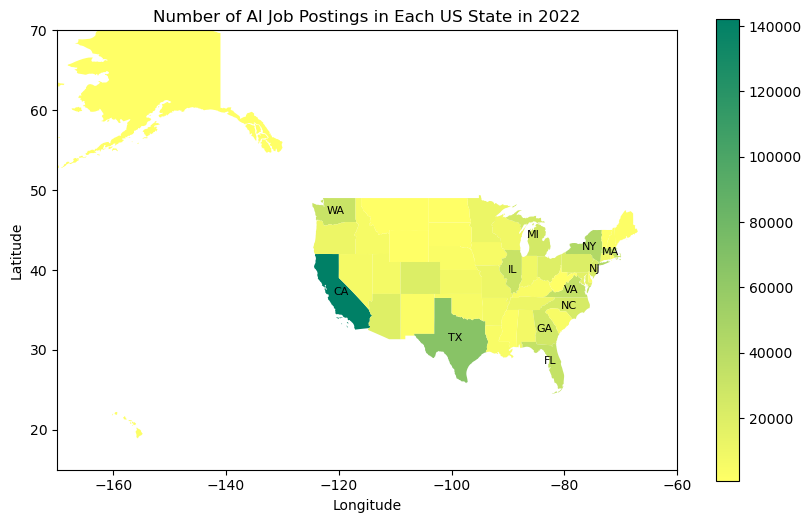

In [ ]:
# Visualizing the top 10 States with highest number of AI job Postings in 2022
# Reference on how to use geojson - https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
# Load the GeoJSON file containing the state boundaries
state_boundaries = gpd.read_file("cb_2018_us_state_20m")

# Load the DataFrame containing the AI job posting data
ai_job_posting_data = df
ai_job_posting_data["NAME"] = ai_job_posting_data["State"]

# Merge the two DataFrames on the "State" column
merged_df = state_boundaries.merge(ai_job_posting_data, on="NAME")

# Create the choropleth map
fig, ax = plt.subplots(figsize = (10,6))
plt.xlim(-170,-60) # set longitude limits for the map
plt.ylim(15,70) # # set latitude limits for the map
merged_df.plot(column="Number AI Job Postings 2022", ax=ax, legend = True, cmap = 'summer_r')

# Annotate the map with state names/codes and count
for x, y, label, count in zip(merged_df.geometry.centroid.x,
                              merged_df.geometry.centroid.y,
                              merged_df["STUSPS"],  # Use the state codes here
                              merged_df["Number AI Job Postings 2022"]):
    if count > 23300:
        ax.text(x, y, label, fontsize=8, ha="center", va="center")

# Set the title and labels
ax.set_title("Number of AI Job Postings in Each US State in 2022")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()

Our exploration begins with a look at AI job postings beyond the well-known tech giants. While California, Texas, New York, and Massachusetts have been AI hubs, we discover that states like Virginia, Florida, Illinois, and Washington are experiencing a surge in AI job openings. This regional distribution sets the stage for our broader examination.

#### **Section 2: Beyond the Tech Giants**

With interest in learning more about the upcoming companies, we are interested in understanding the spread of the AI boom in the startup space. For this purpose, we are exploring the top_1000 companies dataset (created in the Spring of 2023) which has data about top 10,000 companies listed on [Growjo](https://growjo.com) - a company that tracks the fastest growing companies and startups in the world. We have subset the data to the top 1000 companies (data file sourced from Kaggle).

In [ ]:
## Top 1000 Comapnies Data
top_1000 = pd.read_csv("Top_1000_Companies_Dataset 2.csv")

## Process the city, state, country columns
# Convert city and state names to title case and strip leading/trailing spaces
top_1000['city'] = top_1000['city'].str.title().str.strip()
top_1000['state'] = top_1000['state'].str.title().str.strip()

# Make state names in upper case
top_1000['state'] = top_1000['state'].str.upper()

top_1000["country"] = top_1000["country"].str.upper()
countries = {'USA':['USA','UNITED STATES','UNITED STATE','US'],
             'UK':['UK, UNITED KINGDOM'],
             'AUSTRALIA':['AUS', 'AUSTRALIA'],
             'UAE':['UAE','UNITED ARAB EMIRATES'],
             'INDIA':['IND','INDIA'],
             'SINGAPORE':['SGP','SINGAPORE'],
             'CANADA':['CAN','CANADA'],
             'GERMANY':['GER','GERMANY'],
             'NORWAY':['NOR','NO','NORWAY'],
             'IRELAND':['IE','IRELAND'],
             'FINLAND':['FIN','FINLAND'],
             'SWEDEN':['SWE','SWEDEN'],
             'POLAND':['POL','POLAND'],
             'NETHERLANDS': ['NETHERLANDS','NETHARLANDS']}
country_map = {}
for key, values in countries.items():
    for value in values:
        country_map[value] = key

# Replace the values in the column with the corresponding key if there is a match
top_1000['country'] = top_1000['country'].replace(country_map)

top_1000.head()

,company_name,url,city,state,country,employees,linkedin_url,founded,Industry,GrowjoRanking,Previous Ranking,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,product_url,indeed_url,growth_percentage,contact_info
0,OpenAI,openai.com,San Francisco,CA,USA,655,http://www.linkedin.com/company/openai,2015.0,AI,1,1,88722200.0,25.0,"Artificial Intelligence, Online Gaming, Non Pr...","Thrive, Founders Fund",NaN,NaN,2.900000e+10,$11B,https://www.growjo.com/company/OpenAI,https://www.indeed.com/jobs?q=company%3A(OpenAI),118%,For Contact Direct Phone Numbers and Emails se...
1,Alchemy,alchemy.com,San Francisco,CA,USA,201,http://www.linkedin.com/company/alchemyinc,NaN,Fintech,2,2,39269750.0,1.0,NaN,"Lightspeed, Silver Lake",NaN,NaN,1.020000e+10,$564M,https://www.growjo.com/company/Alchemy,https://www.indeed.com/jobs?q=company%3A(Alchemy),134%,For Contact Direct Phone Numbers and Emails se...
2,dbt Labs,getdbt.com,Philadelphia,PA,USA,511,http://www.linkedin.com/company/dbtlabs,2016.0,Analytics,3,3,76987400.0,1.0,NaN,Altimeter,NaN,NaN,4.200000e+09,$414.4M,https://www.growjo.com/company/dbt_Labs,https://www.indeed.com/jobs?q=company%3A(dbt L...,76%,For Contact Direct Phone Numbers and Emails se...
3,Wasabi Technologies,wasabi.com,Boston,MA,USA,355,http://www.linkedin.com/company/wasabitechnolo...,2017.0,Cloud,4,4,38480000.0,4.0,saas,L2 Point,NaN,NaN,1.100000e+09,$286.2M,https://www.growjo.com/company/Wasabi_Technolo...,https://www.indeed.com/jobs?q=company%3A(Wasab...,60%,For Contact Direct Phone Numbers and Emails se...
4,Whatnot,whatnot.com,Los Angeles,CA,USA,551,http://www.linkedin.com/company/whatnot-inc,2019.0,eCommerce,5,5,39664000.0,1.0,NaN,DST Global,NaN,NaN,3.700000e+09,$484.7M,https://www.growjo.com/company/Whatnot,https://www.indeed.com/jobs?q=company%3A(Whatnot),97%,For Contact Direct Phone Numbers and Emails se...


***Where in the United States are the most jobs openings from these top 1000 companies?***
First, let's look at just cities in California. How many companies are in CA and how many Job openings?  

In [ ]:
# Function to plot num of companies
def plot_num_of_comapnies(filtered_df, specific_location, space):
    # Group by state and calculate the count of companies and the sum of job openings
    city_stats = filtered_df.groupby('city').agg({'company_name': 'count', 'job_openings': 'sum'})
    city_stats.reset_index(inplace=True)

    # Create an Altair bar chart
    chart = alt.Chart(city_stats).mark_bar().encode(
        x=alt.X('city:N', title='City'),
        y=alt.Y('company_name:Q', title='Number of Companies'),
        color=alt.Color('city:N', legend=None),
        tooltip=['city:N', 'company_name:Q']
    ).properties(
        width=600,
        height=400,
        title=f'{space} in {specific_location}'
    )

    # Show the Altair chart
    return chart

# Fucntion to plot numof job openings
def plot_num_of_job_openings(filtered_df, specific_location, space):
    # Group by state and calculate the count of companies and the sum of job openings
    city_stats = filtered_df.groupby('city').agg({'company_name': 'count', 'job_openings': 'sum'})
    city_stats.reset_index(inplace=True)

    # Create an Altair bar chart
    chart = alt.Chart(city_stats).mark_bar().encode(
        x=alt.X('city:N', title='City'),
        y=alt.Y('job_openings:Q', title='Job Openings'),
        color=alt.Color('city:N', legend=None),
        tooltip=['city:N', 'job_openings:Q']
    ).properties(
        width=600,
        height=400,
        title=f'Job Openings in {space} in {specific_location}'
    )

    # Show the Altair chart
    return chart


In [ ]:
## Number of comapnies in 'CA'
specific_location = 'CA'
filtered_df = top_1000[top_1000['state'] == specific_location]
space = 'Emerging Tech Companies'
chart1 = plot_num_of_comapnies(filtered_df, specific_location, space)
chart1.display()

alt.Chart(...)

In [ ]:
# Number of Job openings in 'CA'
specific_location = 'CA'
filtered_df = top_1000[top_1000['state'] == specific_location]
chart2 = plot_num_of_job_openings(filtered_df, specific_location, space)
chart2.display()


alt.Chart(...)

Now, lets examine just AI related jobs and companies. Our dataset has a column called industry and a column called keywords.
Non-AI industries also have AI related openings. So, we would subset our data based on AI-related keywords.


In [ ]:
# AI Comapnies Subset
# Subset companies based on the AI related Keywords
# Lets subset the top_1000 dataset to just ai_companies and perform the same analysis
keywords_to_check = [
"Artificial Intelligence", "Big Data", "Data Centers", "Data Discovery", "Analytics",
    "Artificial Intelligence/Machine Learning", "Data Centers", "Internet", "Artificial Intelligence (AI)",
    "Machine Learning (ML)", "Industrial Analytics", "Big Data Analytics", "Business Intelligence",
    "Cloud Data Services", "Information Technology","Retail Technology", "Database", "Mobile Application",
    "Processing", "Geospatial", "Marketing Automation", "Cloud Security", "eDiscovery", "Cloud Computing",
    "Developer APIs", "API Security", "Application Security", "Cybersecurity", "Threat Detection",
    "Cloud Infrastructure", "Online Identity", "Identity Theft Protection", "Enterprise Security",
    "Business Intelligence", "Databases", "Geospatial", "Marketing Automation", "Cloud Data Services"]

# Step 1: Create a mask for rows with any of the keywords from keywords_to_check list
keywords_mask = top_1000['keywords'].str.contains('|'.join(keywords_to_check), case=False, na=False)

# Step 2: Create a mask for rows where "keywords" is NaN or empty, and "industry" is 'AI'
empty_keywords_mask = top_1000['keywords'].isna() | top_1000['keywords'].eq('')
industry_ai_mask = top_1000['Industry'].str.contains('AI ', case=False, na=False)
empty_keywords_and_industry_mask = empty_keywords_mask & industry_ai_mask

# Step 3: Combine the masks using OR operation
final_mask = keywords_mask | empty_keywords_and_industry_mask

# Subset the top_1000 dataframe using the final mask
ai_companies = top_1000[final_mask]

# Display the subsetted dataframe
ai_companies.shape


(75, 23)

**Question: Is there a good AI Job Market outisde of the United States of America?**

In [ ]:
# Outside of the USA, is there a good AI job market?
# Filter out data excluding USA for the global analysis
global_data = ai_companies[top_1000['country'] != 'USA']

# Aggregate the number of AI companies by 'country'
company_counts_by_country = global_data['country'].value_counts().reset_index()
company_counts_by_country.columns = ['country', 'number_of_companies']

# Aggregate the number of job openings by 'country'
job_openings_by_country = global_data.groupby('country').agg({'job_openings': 'sum'}).reset_index()

# Merge the two DataFrames on 'country'
combined_data = pd.merge(company_counts_by_country, job_openings_by_country, on='country', how='outer').sort_values(by='job_openings', ascending=False)
combined_data


,country,number_of_companies,job_openings
0,CANADA,4,18.0
1,UK,1,1.0


Hmm, does not look like a good job market! Let's continue our analysis for the United States.

In [ ]:
specific_location = 'CA'
filtered_df2 = ai_companies[ai_companies['state'] == specific_location]
space2 = 'AI related Companies'
chart = plot_num_of_comapnies(filtered_df2, specific_location, space2)
chart.display()


alt.Chart(...)

In [ ]:
chart2 = plot_num_of_job_openings(filtered_df2, specific_location, space2)
chart2.display()

alt.Chart(...)

Based on the above graph, there are more AI related job roles in Synnyvale and San Mateo (even though they have fewer AI companies) vs Mountain View, Sand Diego or Palo Alto which have relatively more AI companies). ***Who are these companies?***

In [ ]:
filtered_df2[filtered_df2['city'].isin(['Sunnyvale','San Mateo'])]

,company_name,url,city,state,country,employees,linkedin_url,founded,Industry,GrowjoRanking,Previous Ranking,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,product_url,indeed_url,growth_percentage,contact_info
307,Yugabyte,yugabyte.com,Sunnyvale,CA,USA,477,http://www.linkedin.com/company/yugabyte,2016.0,Software,308,310,101803200.0,32.0,"Open Source, Databases, Cloud Infrastructure",NaN,NaN,NaN,1.300000e+09,$291M,https://www.growjo.com/company/Yugabyte,https://www.indeed.com/jobs?q=company%3A(Yugab...,273%,For Contact Direct Phone Numbers and Emails se...
436,Notable,notablehealth.com,San Mateo,CA,USA,213,http://www.linkedin.com/company/notablehealth,2017.0,Digital Health,437,441,33712000.0,1.0,"Health Care Information Technology, Artificial...",NaN,NaN,NaN,NaN,$119.2M,https://www.growjo.com/company/Notable,https://www.indeed.com/jobs?q=company%3A(Notable),280%,For Contact Direct Phone Numbers and Emails se...
807,Exabeam,exabeam.com,San Mateo,CA,USA,722,http://www.linkedin.com/company/exabeam,2013.0,DevOps,808,812,151751600.0,99.0,"saas, Analytics,Enterprise Software,Human Reso...",Lightspeed Venture Partners,NaN,B2B,2.400000e+09,$390M,https://www.growjo.com/company/Exabeam,https://www.indeed.com/jobs?q=company%3A(Exabeam),17%,For Contact Direct Phone Numbers and Emails se...
869,Clari,clari.com,Sunnyvale,CA,USA,789,http://www.linkedin.com/company/clari,2012.0,Salestech,870,876,165765600.0,106.0,"Analytics,Enterprise Software,Marketing,Market...","Sequoia Capital, Bain Capital Ventures, enaya ...",NaN,B2B,2.600000e+09,$496M,https://www.growjo.com/company/Clari,https://www.indeed.com/jobs?q=company%3A(Clari),15%,For Contact Direct Phone Numbers and Emails se...


The four companies listed above have less than 800 employees, have been recently founded in the past 5-8 years, with 2 of them having more than $ 2 Billion in Valuation. This leads us  to the below questions -

1. Is there any correlation between growth of a company vs the number of employees and and growth vs estimated revenues?
2. Do accelerator programs make a significant difference in the valuations of AI companies? Are all billion dollar startups backed by popular investors?

Let's try to answer each question.

##### **Section 3: Unraveling the Relationship Between Employees, Revenues, and Growth**

***Question : Is there any correlation between growth of a company vs the number of employees and and growth vs estimated revenues?***

This question is interesting to us because of the below factors -

-> Typically, as companies grow, they need more employees to handle increased operations, sales, customer service, and other functions. <br>
Hence, one would generally expect a positive correlation between company growth and the number of employees. As the company expands, it hires more people.

-> The growth of a company is often directly associated with its revenue growth. When we talk about the growth of a company in financial terms, we often refer to increasing revenues. <br>Hence, one would expect a strong positive correlation between company growth and estimated revenues. As the company grows, its revenue typically increases.

However, there can be exceptions. For instance, companies in industries with high automation or digital services might grow significantly in terms of revenue or customer base without a proportionate increase in employee count. Likewise, companies that emphasize operational efficiency might achieve growth without scaling their workforce linearly.

In [ ]:
# Functions to assist in plot generation
# Compute the founded age bracket
def get_age_buckst(df):
    current_year = pd.Timestamp.now().year
    df['age'] = current_year - df['founded']
    df['age_bucket'] = pd.cut(
        df['age'],
        bins=[0, 5, 10, 15, 20, np.inf],
        labels=['<5 years', '5-10 years', '10-15 years', '15-20 years', '>20 years']
        #labels=['<3 years', '3-5 years', '5-7 years', '7-10 years', '10-12 years','12-15 years','>15 years']
        #labels=['<7 years', '7-12 years', '12-18 years', '>18 years']
    )
    return df

# Growth vs Number of Employees
def plot_growth_vs_number_of_employees(df, subtitle):
    filtered_df = get_age_buckst(df)
    # Step 1a: Conversion
    # Convert 'growth_percentage' to numeric (from percentages)
    filtered_df['growth_percentage'] = filtered_df['growth_percentage'].str.rstrip('%').astype(float)
    # Step 1b: Analysis
    # Calculate the correlation between 'growth_percentage' and 'employees' - using Spearman since the data is highly skewed
    correlation = filtered_df['growth_percentage'].corr(filtered_df['employees'],method='spearman')
    print("Correlation: ",correlation)

    chart = alt.Chart(filtered_df).mark_circle(size=60, opacity=0.7).encode(
        x=alt.X('employees:Q', title='Number of Employees'),
        y=alt.Y('growth_percentage:Q', title='Growth %'),
        color=alt.Color('age_bucket:N', legend=alt.Legend(title="Age of Company")),
        tooltip=['company_name:N','growth_percentage:Q', 'estimated_revenues:Q', 'employees:Q', 'founded:Q'],
    ).interactive().properties(
        title = {
            "text": ["Number of Employees vs Growth % of the company"],
        "subtitle": subtitle,
        "color": "black",
        "subtitleColor": "green"
        },
        width=600,  # Set the chart width
        height=400,  # Set the chart height
    )
    # Step 3: Customize the Chart
    chart.configure_axis(
        labelFontSize=12,  # Customize label font size
        titleFontSize=14,  # Customize title font size
    ).configure_title(
        fontSize=16,  # Customize chart title font size
    )
    return chart

# Growth vs Estimated Revenues
def plot_growth_vs_estimated_revenues(df, subtitle):
    filtered_df = get_age_buckst(df)
    # Step 1a: Conversion
    # Convert 'growth_percentage' to numeric (from percentages)
    filtered_df.loc[:,'growth_percentage'] = filtered_df['growth_percentage'].str.rstrip('%').astype(float)

    # Step 1b: Analysis
    # Calculate the correlation between 'growth_percentage' and 'employees' - using Spearman since the data is highly skewed
    correlation = filtered_df['growth_percentage'].corr(filtered_df['estimated_revenues'],method='spearman')
    print("Correlation: ",correlation)

    # Create a scatter plot
    scatter_plot = alt.Chart(filtered_df).mark_circle(size=60).encode(
        y=alt.Y('growth_percentage:Q', title='Growth Percentage'),
        x=alt.X('estimated_revenues:Q', title='Estimated Revenues'),
        color=alt.Color('age_bucket:N', legend=alt.Legend(title="Age of Company")),
        tooltip=['company_name:N', 'growth_percentage:Q', 'estimated_revenues:Q', 'employees:Q', 'founded:Q']
    ).interactive().properties(
        width=600,
        height=400,
        title={
            'text' : ["Scatter Plot of Growth Percentage vs Estimated Revenues"],
            'subtitle' : subtitle,
            "subtitleColor": "green"
        }
    )
    return scatter_plot


In [ ]:
# EMPLOYEE COUNT VS GROWTH
# FOR ALL 1000 COMPANIES
# Remove rows with missing values in 'growth_percentage' and 'employees' columns
filtered_df = top_1000.dropna(subset=['growth_percentage', 'employees'])
subtitle = ["Most companies with lesser employees, have seen a lesser growth %. However, there are some exceptions",
                    "For companies having more than 800 employees, there are only a handful who have more than 100% growth rate."]
scatter_plot1 = plot_growth_vs_number_of_employees(filtered_df, subtitle)
print("For Top 1000 Companies")
scatter_plot1.display()

# FOR AI Companies
# Remove rows with missing values in 'growth_percentage' and 'employees' columns
filtered_df = ai_companies.dropna(subset=['growth_percentage', 'employees'])
subtitle = ["Handful of AI Companies seeing a higher growth % have fewer employees than companies seeing lower growth %"]
ai_scatter_plot1 = plot_growth_vs_number_of_employees(filtered_df, subtitle)
print("For AI Companies")
ai_scatter_plot1.display()

Correlation:  -0.12475238908914922
For Top 1000 Companies


alt.Chart(...)

Correlation:  -0.17590478298140327
For AI Companies


alt.Chart(...)

In [ ]:
# ESTIMATED REVENUES VS GROWTH
## similar reation to growth vs estimated_revenues?
# FOR ALL TOP 1000 COMPANIES
# Filter out rows with missing values in 'estimated_revenues'
filtered_df = top_1000.dropna(subset=['growth_percentage', 'estimated_revenues', 'employees'])
subtitle = ["Studying companies with revenues less than 250 million.","This visualization does not provide any insight."]
scatter_plot2 = plot_growth_vs_estimated_revenues(filtered_df, subtitle)
print("For Top 1000 Companies")
scatter_plot2.display()

# FOR AI Companies
filtered_df = ai_companies.dropna(subset=['growth_percentage', 'estimated_revenues', 'employees'])
subtitle = ["Studying companies with revenues less than 250 million.","This visualization does not provide any insight."]
ai_scatter_plot2 = plot_growth_vs_estimated_revenues(filtered_df, subtitle)
print("For AI Companies")
ai_scatter_plot2.display()

Correlation:  -0.22125330900990048
For Top 1000 Companies


alt.Chart(...)

Correlation:  -0.28646330580239066
For AI Companies


alt.Chart(...)

In [ ]:
# ESTIMATED REVENUES VS GROWTH WITHOUT OUTLIERS
# if we remove the outliers, then
# FOR TOP 1000 COMPANIES
# Filter out rows with missing values in 'estimated_revenues'
filtered_df = top_1000.dropna(subset=['growth_percentage', 'estimated_revenues', 'employees'])
filtered_df = filtered_df[~filtered_df['company_name'].isin(['BAE Systems', 'Jacobs'])]
filtered_df = filtered_df[filtered_df['estimated_revenues'] < 250000000]
subtitle = ["Studying companies with revenues less than 250 million.","This curve looks somewhat similar to the curve Growth vs Number of Emplyees for all companies"]
scatter_plot3 = plot_growth_vs_estimated_revenues(filtered_df, subtitle)
print("For Top 1000 Companies")
scatter_plot3.display()

# FOR AI COMPANIES
filtered_df = ai_companies.dropna(subset=['growth_percentage', 'estimated_revenues', 'employees'])
filtered_df = filtered_df[~filtered_df['company_name'].isin(['BAE Systems', 'Jacobs'])]
filtered_df = filtered_df[filtered_df['estimated_revenues'] < 250000000]
subtitle = ["Studying companies with revenues less than 200 million.","This curve looks somewhat similar to the curve Growth vs Number of Emplyees for AI companies", "AI companies founded less than 5 years ago have higher growth %."]
ai_scatter_plot3 = plot_growth_vs_estimated_revenues(filtered_df, subtitle)
print("For AI Companies")
ai_scatter_plot3.display()

Correlation:  -0.20469619878814907
For Top 1000 Companies


alt.Chart(...)

Correlation:  -0.26630406193129275
For AI Companies


alt.Chart(...)

<b>FINDINGS:</b>
Most companies with lesser employees, see a lesser growth %. However, there are some exceptions. For companies having more than 800 employees, there are only a handful who have more than 100% growth rate.

By just eyeballing the graph, it might look like there is some positive correlation between employee count vs growth, however the correlation is insignigficant to confidentally comment on any kind of correlation. The spearman correlation turns out to be infact negative.

AI companies founded less than 5 years ago have higher growth % and a smaller employee count. This supports the fact that companies grow faster in their initial years and their growth slows down later down the line and have a very small workforce initially. Reference - [Growth Analysis Notebook](https://drive.google.com/file/d/1a2hjAo0SPKSFMOmJm_cGnAATZCTsz8A_/view?usp=drive_link)

Let's see if there is any insight in a plot for revenues vs no. of job openings.


In [ ]:
ai_keywords_subset = ai_companies
print(ai_keywords_subset.shape)

# Dealing with outliers
# Find the index of the row with 'BAE Systems' in the 'company_name' column
index_to_drop = ai_keywords_subset[ai_keywords_subset['company_name'] == 'BAE Systems'].index

# Drop the row with the specified index
ai_keywords_subset = ai_keywords_subset.drop(index_to_drop)

# Reset the index to renumber the rows if needed
ai_keywords_subset.reset_index(drop=True, inplace=True)
df = get_age_buckst(ai_keywords_subset)

chart = alt.Chart(df).mark_circle().encode(
    x='estimated_revenues:Q',
    y='job_openings:Q',
    color=alt.Color('age_bucket:N', legend=alt.Legend(title="Age of Company")),
    tooltip=['company_name', 'estimated_revenues', 'job_openings']
).interactive().properties(
    title='Influence of Revenues on Job Openings by Company'
)
chart

(75, 23)


alt.Chart(...)

<b>FINDINGS:</b>
Utilizing the subset of companies promoting AI jobs - it is interesting to see that higher revenues do not necessarily contribute towards more job openings or vice-versa. It is possible that due to small data size, it is difficult to extract any meaningful insight.


#### **SECTION 4: AI Startup Valuations**
Now we look to understand the trends in these companies reaching their current valuations.

***Question: How long does it take for startups to reach Billion Dollar Valuation? Could their valuation be solely based on funding from investors or accelerators without the companies generating much revenues? or based on their market performance?***

**1. Distribution of companies based on their founding year.**

In [ ]:
# Dsitrubtion for top 1000 companies
top_1000_founded_df = top_1000.groupby('founded').size().reset_index(name='count')

# Create the histogram using Altair
chart = alt.Chart(top_1000_founded_df).mark_bar().encode(
    x=alt.X("founded:O", title="Year"),
    y=alt.Y("count:Q", title="Number of Companies"),
    tooltip=['founded', 'count']
).properties(
    width=700,
    height=500,
    title="Distribution of Companies Based on Founding Year"
)
chart

alt.Chart(...)

The histogram provides a distribution of companies based on their founding year. We can observe that a significant number of companies in the dataset were founded in recent years, especially from around 2010 onwards.
<br>

**2. Let's identify how many of these companies reached a billion-dollar valuation by 2023.**

In [ ]:
# Filter companies with a valuation of at least $1 billion by 2023
billion_dollar_companies = top_1000[top_1000['valuation'] >= 1e9]

# Display basic statistics about these companies
billion_dollar_companies_stats = {
    "Total Companies": len(billion_dollar_companies),
    "Earliest Founding Year": billion_dollar_companies['founded'].min(),
    "Latest Founding Year": billion_dollar_companies['founded'].max(),
    "Average Founding Year": billion_dollar_companies['founded'].mean()
}

print(billion_dollar_companies_stats)

# Calculate the number of years it took for these companies to reach a billion-dollar valuation
billion_dollar_companies['years_to_>billion'] = 2023 - billion_dollar_companies['founded']

# Display the top few rows with this new information
print("There are",billion_dollar_companies.shape[0],"companies that have reached more than $1 Billion in Valuation. \n Top 5 sorted by founded year and valuation are: ")
print(billion_dollar_companies[['company_name', 'founded', 'valuation', 'years_to_>billion']].head(5))


{'Total Companies': 346, 'Earliest Founding Year': 1888.0, 'Latest Founding Year': 2021.0, 'Average Founding Year': 2013.01}
There are 346 companies that have reached more than $1 Billion in Valuation. 
 Top 5 sorted by founded year and valuation are: 
          company_name  founded     valuation  years_to_>billion
0               OpenAI   2015.0  2.900000e+10                8.0
1              Alchemy      NaN  1.020000e+10                NaN
2             dbt Labs   2016.0  4.200000e+09                7.0
3  Wasabi Technologies   2017.0  1.100000e+09                6.0
4              Whatnot   2019.0  3.700000e+09                4.0


In [ ]:
# Plot distribution of years it took for companies to reach billion-dollar valuation
histogram_chart = alt.Chart(billion_dollar_companies).mark_bar().encode(
    alt.X("years_to_>billion:Q", bin=alt.Bin(maxbins=30), title="Number of Years"),
    alt.Y("count():Q", title="Number of Companies"),
    tooltip=[alt.Tooltip('years_to_>billion', title='Years since founded'), 'count()']
).properties(
    width=600,
    height=400,
    title="Distribution of Years Taken to Reach >Billion-Dollar Valuation"
)

histogram_chart

alt.Chart(...)

- A majority of the companies took between 0 to 10 years to reach the billion-dollar valuation mark.
- There's a noticeable spike for companies that took around 5-7 years.
- Few companies took longer, in the range of 20-60 years, indicating more traditional businesses or those that experienced significant growth after an extended period.
- ***This distribution reflects the rapid scaling and growth of many modern startups and tech companies, which can achieve substantial valuations within a relatively short time span.***

In [ ]:
# Visualization shows the companies that have reached billion dollar valuation and how long it took them

# Below is also an example of multi-selection charts provided by altair -
# We will massage the data for the scatter plot and the bar plot
# For the scatter plot, data is aggregated by year
scatter_data = billion_dollar_companies.groupby(['founded', 'years_to_>billion']).size().reset_index(name='count')

# Define a single selection with empty set to 'all'
selection_all = alt.selection_multi(fields=['founded'], empty='none')

# Scatter plot with the new selection added
scatter_chart_all = alt.Chart(scatter_data).mark_circle(fillOpacity=0.85).encode(
    x=alt.X('founded:O', title='Founding Year'),
    y=alt.Y('years_to_>billion:Q', title='Years to Reach $1B Valuation', scale=alt.Scale(zero=False)),
    #size=alt.Size('count:Q', title='Number of Companies'),
    tooltip=['founded', 'years_to_>billion', 'count'], size=alt.Size('count:Q', scale=alt.Scale(range=[100, 1000])),
    color=alt.condition(selection_all, alt.ColorValue("steelblue"), alt.ColorValue("lightgray"))
).properties(
    width=400,
    height=380,
    title="How many Companies founded in a given year have >$1Billion Valuation?"
).add_selection(
    selection_all
)

# Bar chart with conditional data based on the selection or latest year
bar_chart_all = alt.Chart(billion_dollar_companies).mark_bar().encode(
    y=alt.X('company_name:N', title='Company Name', sort='-x'),
    x=alt.Y('valuation:Q', title='Valuation ($)'),
    color=alt.Color('valuation:Q', scale=alt.Scale(scheme='purpleblue'), title='Valuation ($)'),
    tooltip=['company_name', 'valuation', 'founded']
).transform_filter(
    selection_all
).properties(
    width=500,
    height=380,
    title="Valuation of Companies by Founding Year (Selected)"
)

scatter_chart_all | bar_chart_all


alt.HConcatChart(...)

- OpenAI was founded in 2015 and took approximately 8 years to reach its valuation.
- Alchemy has reached a valuation of over $10 billion, but its founding year is missing in the dataset. (A quick google search suggests, it was founded in 2017 https://research.contrary.com/reports/alchemy)
- dbt Labs was founded in 2016 and took approximately 7 years to achieve its valuation.
- Wasabi Technologies was founded in 2017 and took about 6 years.
- Whatnot was founded in 2019 and reached its valuation in just 4 years.

***How about just AI companies? How many of them reached billion dollar valuation? And who are these?***

In [ ]:
ai_billion_dollar_companies = pd.merge(ai_companies, billion_dollar_companies, how='inner')
print("There are about", ai_billion_dollar_companies.shape[0], "billion dollar AI companies" )
scatter_data = ai_billion_dollar_companies.groupby(['founded', 'years_to_>billion']).size().reset_index(name='count')

# Define a single selection with empty set to 'all'
selection_all = alt.selection_multi(fields=['founded'], empty='none')

# Scatter plot with the new selection added
scatter_chart_all = alt.Chart(scatter_data).mark_circle(fillOpacity=0.85).encode(
    x=alt.X('founded:O', title='Founding Year'),
    y=alt.Y('years_to_>billion:Q', title='Years to Reach $1B Valuation', scale=alt.Scale(zero=False)),
    #size=alt.Size('count:Q', title='Number of Companies'),
    tooltip=['founded', 'years_to_>billion', 'count'], size=alt.Size('count:Q', scale=alt.Scale(range=[100, 1000])),
    color=alt.condition(selection_all, alt.ColorValue("steelblue"), alt.ColorValue("lightgray"))
).properties(
    width=400,
    height=400,
    title="How many Companies founded in a given year have >$1Billion Valuation?"
).add_selection(
    selection_all
)

# Bar chart with conditional data based on the selection or latest year
bar_chart_all = alt.Chart(ai_billion_dollar_companies).mark_bar().encode(
    y=alt.X('company_name:N', title='Company Name', sort='-x'),
    x=alt.Y('valuation:Q', title='Valuation ($)'),
    color=alt.Color('valuation:Q', scale=alt.Scale(scheme='purpleblue'), title='Valuation ($)'),
    tooltip=['company_name', 'valuation', 'founded']
).transform_filter(
    selection_all
).properties(
    width=480,
    height=380,
    title="Valuation of Companies by Founding Year (Selected)"
)

scatter_chart_all | bar_chart_all


There are about 33 billion dollar AI companies


alt.HConcatChart(...)

Which industries are these different companies concentrated in? This might differ since not all AI Job openings were in the AI industry.

**3. Industry Analysis: Understand the distribution of companies across different industries. Which industries have the most representation?**

In [ ]:
# Industry distribution
# Creating the data for the top 10 industries
industry_counts_alt = ai_companies['Industry'].value_counts().reset_index()
industry_counts_alt.columns = ['Industry', 'Number of Companies']
top_industries_alt = industry_counts_alt.head(10)

# Altair chart for the top 10 industries based on number of companies
industry_chart_alt = alt.Chart(top_industries_alt).mark_bar(color='skyblue').encode(
    alt.Y('Industry:N', sort='-x', title='Industry'),
    alt.X('Number of Companies:Q'),
    tooltip=['Industry:N', 'Number of Companies:Q']
).properties(
    title="Top 10 Industries Among the AI Companies by Number of Companies",
    width=400,
    height=200
)

# Aggregating data to get the total number of job openings for each industry
industry_job_openings = ai_companies.groupby('Industry').agg({'job_openings': 'sum'}).reset_index()
industry_job_openings = industry_job_openings.sort_values(by='job_openings', ascending=False).head(10)

# Altair chart for the top 10 industries based on job openings
industry_job_openings_chart = alt.Chart(industry_job_openings).mark_bar(color='skyblue').encode(
    alt.Y('Industry:N', sort='-x', title='Industry'),
    alt.X('job_openings:Q', title='Number of Job Openings'),
    tooltip=['Industry:N', 'job_openings:Q']
).properties(
    title="Top 10 Industries Among the AI Companies by Number of Job Openings",
    width=400,
    height=200
)

industry_chart_alt | industry_job_openings_chart

alt.HConcatChart(...)

The bar chart displays the top 10 industries among the AI Companies
- IT Security, Analytics and Digital Health have the highest number of AI companies, whereas there are more AI roles in DevOps, followed by Marketing Technology, IT Security and FinTech.
- Compnaies in industries like IT Security, DevOps, FinTech, Marketing Technology, Analytics, AI, and Software could be good to target for future employment seekers. These industries seem to be adapting AI and also looking to increase their AI-skilled workforce.

**We'll identify the top investors based on their frequency of investments in the dataset.​**

In [ ]:
# Extract lead investors using the correct column name and their frequency of investments

# Function to plot the investor counts
def plot_investors(df, company):
    top_investors = df.head(15)
    # Altair chart for top 10 investors from the entire dataset
    investor_chart_all = alt.Chart(top_investors).mark_bar(color='mediumseagreen').encode(
        x=alt.X('Number of Companies Invested In:Q', title="Number of Companies Invested In"),
        y=alt.Y('Investor:O', sort='-x', title="Investor"),
        tooltip=['Investor', 'Number of Companies Invested In']
    ).properties(
        width=300,
        height=200,
        title=f"Top 15 Lead Investors by Number of Investments for {company}"
    )
    return investor_chart_all

# Function to get the investor counts for a given df
def investor_company_counts(df):
    """
    Processes the investor data and return a DataFrame with the count
    of companies each investor has invested in.
    """
    # Split the 'investors' column, explode it to get one row for each investor
    investors_exploded = df['LeadInvestors'].str.split(',').explode()

    # Clean the investor names (remove leading and trailing spaces)
    investors_cleaned = investors_exploded.str.strip()
    investors_cleaned = investors_cleaned[investors_cleaned.str.len() > 0]

    # Get the count for each investor
    investor_counts = investors_cleaned.value_counts().reset_index()
    investor_counts.columns = ['Investor', 'Number of Companies Invested In']
    return investor_counts


In [ ]:
# Who are the top investors in top 100 companies and AI Companies
top_1000_investors = investor_company_counts(top_1000)
ai_companies_investors = investor_company_counts(ai_companies)

top_investors = plot_investors(top_1000_investors, 'Top 1000 Companies')
top_ai_investors = plot_investors(ai_companies_investors, 'For AI Companies')

top_investors | top_ai_investors

alt.HConcatChart(...)

In [ ]:
# Who are the top investors in Billion Dollar Companies and Billion Dollar AI Companies
#Extracting and counting lead investors for companies with billion-dollar valuation
billiondollar_companies_investors = investor_company_counts(billion_dollar_companies)
top_billion_investors = plot_investors(billiondollar_companies_investors, 'For Billion Dollar Companies')

ai_billiondollar_companies_investors = investor_company_counts(ai_billion_dollar_companies)
top_ai_billion_investors = plot_investors(ai_billiondollar_companies_investors, 'For Billion Dollar AI Companies')

top_billion_investors | top_ai_billion_investors

alt.HConcatChart(...)

The top investors are creating billion dollar companies. The top investors in AI companies are also creating Billion Dollar AI Companies.

Interestingly, **Lightspeed Venture Partners, Google Ventures, Andreessen Harowitz, Bain Capital Ventures** have a 100% rate of converting AI companies to Billion dollar AI Companies. They are selective in who they fund. Similarly, more investors with 100% conversion rate exist in the data.

***Question : Effect of Accelerators on Valuation - Accelerators have become a buzzword in the startup world. Accelerators make startups program while investors wait to invest in strong Companies. But do companies that have participated in accelerators truly have higher valuations?***

In [ ]:
# [Placeholder for a graph comparing valuations of companies with and without accelerator participation]
from scipy.stats import ttest_ind

# Data preparation
experiment_df = top_1000[['company_name', 'Accelerator', 'valuation']]

# Create a binary feature 'hasAccelerator'
experiment_df['hasAccelerator'] = (~experiment_df['Accelerator'].isnull()).astype(int)
print("Companies with Accelrator")
print(experiment_df[experiment_df['hasAccelerator']==1])

# Filter rows with valuation data
experiment_df = experiment_df.dropna(subset=['valuation'])
experiment_df.loc[:,'valuation'] = pd.to_numeric(experiment_df['valuation'], errors='coerce')

# Grouping data
with_accelerator = experiment_df[experiment_df['hasAccelerator'] == 1]
without_accelerator = experiment_df[experiment_df['hasAccelerator'] == 0]
print(with_accelerator.shape)
print(without_accelerator.shape)

# Hypothesis testing
t_stat, p_value = ttest_ind(with_accelerator['valuation'], without_accelerator['valuation'], equal_var=False)
print(t_stat, p_value)
# Output the results
if p_value < 0.05:  # Assuming a significance level of 0.05
    print("The difference in valuations between companies with and without accelerators is statistically significant.")
else:
    print("There is no significant difference in valuations between companies with and without accelerators.")

Companies with Accelrator
       company_name   Accelerator     valuation  hasAccelerator
50      Flutterwave  Y Combinator  3.000000e+09               1
97          Webflow  Y Combinator  4.000000e+09               1
139     Chainalysis     TechStars  8.600000e+09               1
144             GO1  Y Combinator  2.000000e+09               1
189        Ironclad  500 Startups  3.200000e+09               1
201          AutoFi  500 Startups  7.000000e+08               1
273      GoCardless  Y Combinator  2.100000e+09               1
329          Veriff  Y Combinator  1.500000e+09               1
459       LogicGate     TechStars           NaN               1
538  Human Interest  Y Combinator  1.000000e+09               1
669         Headout  500 Startups           NaN               1
831  Gecko Robotics  Y Combinator           NaN               1
(9, 4)
(459, 4)
0.7903396059397427 0.44904669973948186
There is no significant difference in valuations between companies with and without acc

In [ ]:
# Mean valuation of Accelerators who invested in startups
data = with_accelerator

# Create a bar chart
chart = alt.Chart(data).mark_bar().encode(
    alt.X('hasAccelerator:O', title='Has Accelerator', axis=alt.Axis(labels=False)),
    alt.Y('mean(valuation):Q', title='Mean Valuation'),
    alt.Color('hasAccelerator:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), legend=None)
).facet(
    column=alt.Column('Accelerator:N', title='Accelerator'),
    spacing=100
).properties(
    title='Comparison of Mean Valuations by Accelerator',
)

# Show the chart
chart

alt.FacetChart(...)

<b>FINDINGS:</b>
Our expectation was that companies that have undergone accelerator programs would have higher valuations. Instead, there seems to be no significant difference. This maybe due to data limitation. This could be  also be due to different type of accerlator program that the comapny is enrolled in and also be affected by the different stage of funding they may be in.

Also, from the accelerators who did invest in these emerging companies, what did the mean valuation between them looked like. Investments made by TechStars seems to be having higher mean valuations than 500 Startups and Y Combinator. Due to lack of data, any comment for AI specific companies cannot be made.


Our journey through this research has been market-driven.

From understanding the rise in the AI job market over the years and idenitfying the AI hubs in the United States (and globally), we saw that USA has seen the fastest adoption of AI and a growing job market, followed by Spain being the next fastest growing market. Within the United States, there are emerging hubs in Florida, Illinois, Washington, Georgia.

We then concluded that while bigger cities have been the tech hubs, smaller cities with access to these hubs are also popping up as we saw in the case of cities in California.

To understand company growth, we attempted to dissect correlations between job opportunites and their estimated revenues (a big factor in analyzing growth). Surprisingly, we found lack of any correlation for these top startups hinting at different possibly diversified strategies for organization structure, business objectives, and investment phase.

To further our understanding, we identified which are the top industries for these fast growing startups, idenitfied investors responsible for making them billion dollar companies, and if being a part of an accelerator program increases their valuations.

Having explored the external dimensions, our focus now shifts to the inherent factors that impact an individual's professional progression. From the below survey response analysis, we seek to comprehend the motivations that steer individuals as they navigate their career paths.

##### Chapter 7: **The Drivers Behind Career Choices**: How does one navigate through the career path?

As graduate student, we want to reflect and understand the perosnal motivations for our career choices. Is it market driven or more instrinsic. Our aim to is to identify factors that are motivating our career journey. For this purpose, we researched datasets which can help us uncover some insights on this topic. However, owing to lack of publicly available data, the only source we could locate was from a survey conducted at The Islamia University of Bahawalpur, Punjab, Pakistan ([data available on Kaggle](https://www.kaggle.com/datasets/mtalhazafar/career-path-selection-challenges)). This dataset aims to shed light on the difficulties students encounter when choosing their career paths and how these challenges affect their academic pursuits. It is a small sample of data, however this anaylysis will also aid is identifying how important the need of such kind of global data may be.

In [ ]:
# Load the student responses data
original_responses = pd.read_csv("Student_Responces.csv")
original_responses.head(10)

,Gender,Are you confident in your chosen career path?,What factors affect your career decision-making process?,How_did you_choose_your_career_path?,Have you sought advice from a career counselor or career advisor?,Did you face pressure in choosing a career path?,Do you think your current career choice aligns with your skills and strengths?,Have you ever thought that the path you have chosen is not suitable for you? You could have done better if you had chosen another path.,"If you realize that your initially chosen career path is not suitable for you, are you confident in shifting to a different career path?",Do you believe that choosing the wrong career path can lead to academic failure?,Do you think schools/colleges should offer career counseling and guidance programs?,"In your opinion, what can educational institutions do to help students choose their career paths more effectively? (Open-ended)"
0,Male,Yes,Passion for a specific field,Based on personal interests and passion,No,Yes,Yes,Yes,No,Yes,Yes,NaN
1,Male,Yes,Job market trends,Talked to friends/family,No,No,Yes,No,No,Yes,Yes,NaN
2,Male,No,Passion for a specific field,Based on financial stability,No,Yes,No,Yes,Yes,Yes,Yes,NaN
3,Female,Yes,Passion for a specific field,Talked to friends/family,No,No,No,Yes,No,Yes,Yes,NaN
4,Male,Yes,Financial stability,Based on financial stability,No,Yes,No,Yes,Yes,No,Yes,NaN
5,Male,Yes,Job market trends,Talked to friends/family,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Should have proper career counseling
6,Male,Yes,Passion for a specific field,Based on personal interests and passion,No,Yes,Yes,Yes,No,Yes,No,They open business not a training institute.
7,Male,Yes,Passion for a specific field,Based on personal interests and passion,Yes,No,Yes,No,No,No,Yes,NaN
8,Female,Yes,Financial stability,Based on personal interests and passion,No,Yes,Yes,No,No,Yes,Yes,NaN
9,Female,Yes,Passion for a specific field,Based on personal interests and passion,No,No,Yes,No,No,Yes,Yes,Better career counseling and enhancing skills


In [ ]:
new_column_names = {
   'Gender' : 'col0' ,
   'Are you confident in your chosen career path?' : 'col1',
   'What factors affect your career decision-making process?' : 'col2',
   'How_did you_choose_your_career_path?' : 'col3',
   'Have you sought advice from a career counselor or career advisor?' : 'col4',
   'Did you face pressure in choosing a career path?' : 'col5',
   'Do you think your current career choice aligns with your skills and strengths?' : 'col6',
   'Have you ever thought that the path you have chosen is not suitable for you? You could have done better if you had chosen another path.' : 'col7',
   'If you realize that your initially chosen career path is not suitable for you, are you confident in shifting to a different career path?' : 'col8',
   'Do you believe that choosing the wrong career path can lead to academic failure?' : 'col9',
   'Do you think schools/colleges should offer career counseling and guidance programs?' : 'col10',
   'In your opinion, what can educational institutions do to help students choose their career paths more effectively? (Open-ended)' : 'col11'
   }
new_columns = ['col0','col1','col2','col3','col4','col5','col6','col7','col8','col9','col10','col11']
responses = original_responses
responses.columns = new_columns

**The Influence of Personal Interest & Financial Stability on Career Choices**

We began by exploring how individuals chose their specific career paths, shedding light on the factors guiding their choices.

In [ ]:
# What factors affect your career decision-making process?

# Count the frequency of each factor
factor_counts = responses['col2'].value_counts().reset_index()
factor_counts.columns = ['Factor', 'Count']

chart = alt.Chart(factor_counts).mark_bar().encode(
    x='Factor:N',
    y=alt.Y('Count:Q', title='Number of Responses'),
    tooltip=['Factor:N', 'Count:Q'],
).properties(
    title='What factors affect your career decision-making process?',
    width=600,
    height=500
)

chart = chart.configure_axisX(labelAngle=0)
chart

alt.Chart(...)

In [ ]:
# Count the frequency of each factor
## Here we analyze the factors affecting career selection
factor_counts = responses['col3'].value_counts().reset_index()
factor_counts.columns = ['Factor', 'Count']

# Create the Altair bar chart
chart = alt.Chart(factor_counts).mark_bar().encode(
    y=alt.Y('Factor:N', title='Factors Affecting Career Selection'),
    x=alt.X('Count:Q', title='Number of Responses'),
    tooltip=['Factor:N', 'Count:Q'],
).properties(
    title='How did you choose your career path?',
    width=600,
    height=250
)

chart

alt.Chart(...)

An intriguing discovery emerged: beyond financial incentives and market trends, it was their genuine passion and interest in their field of work that held the most value while deciding their career path.

**The Influence of Knowledge and Skills on Career Choices**:
Our exploration extended to grasp how knowledge and skill sets impact personal career decisions. A fascinating observation emerged: career choices are predominantly guided by the skills individuals have already acquired, while choices seldom revolve around skills not yet attained. In essence, individuals are less inclined to embark on career paths that rely on skills acquired on the job. This inclination is deeply rooted, and it also explains why people tend to be hesitant about transitioning to different career paths later in their professional journey.

In [ ]:
# Count the frequency of each factor
## Here we analyze the factors affecting career selection
factor_counts = responses['col6'].value_counts().reset_index()
factor_counts.columns = ['Factor', 'Count']

# Create the Altair bar chart
chart = alt.Chart(factor_counts).mark_bar().encode(
    x='Factor:N',
    y=alt.Y('Count:Q', title='Number of Responses'),
    tooltip=['Factor:N', 'Count:Q'],
).properties(
    title='Do you think your current career choice aligns with your skills and strengths?',
    width=400
)

# Customize the appearance
chart = chart.configure_axisX(labelAngle=0)

chart

alt.Chart(...)

In [ ]:
# Count the frequency of each factor
## Here we analyze the factors affecting career selection
factor_counts = responses['col8'].value_counts().reset_index()
factor_counts.columns = ['Factor', 'Count']

# Create the Altair bar chart
chart = alt.Chart(factor_counts).mark_bar().encode(
    x='Factor:N',
    y=alt.Y('Count:Q', title='Number of Responses'),
    tooltip=['Factor:N', 'Count:Q'],
).properties(
    title='If you realize that your initially chosen career path is not suitable for you, are you confident in shifting to a different career path?',
    width=400
)

# Customize the appearance
chart = chart.configure_axisX(labelAngle=0)

chart

alt.Chart(...)

##### **Key takeaway**: Your career journey is an amalgamation of a multitude of factors
1. Identifying your interests and passions is crucial for aligning with your ideal career path.
2. Developing a specialized, niche skill set is a foundational element that shapes your career within a specific industry or job role and motivation for further career growth.

##### Conclusion

Our journey into the world of AI careers revealed a rich tapestry of data-driven insights. From the value of diversity and the impact of accelerators to the correlation between job openings, revenue, and personal motivations, we found a roadmap to navigate the ever-evolving job market.
<ADD>

How should graduate students navigate this journey? Our analysis has shed light on the factors influencing today's job market, employment landscape, and personal preferences. We offer this report as a starting point for graduating students to navigate their career journey:

Self-Reflection: What are my true passions? What specific skill sets are essential for pursuing a career in my chosen field? Is there a growing demand for professionals in my field of interest? Should I target startups or established corporations based on my preferences? Which companies align with my career goals? Do they offer relevant job opportunities and exhibit growth? Do these companies have investments or partnerships with billion-dollar firms?